### About Data –
##### In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey. The data file (responses.csv) consists of 1010 rows and 150 columns (139 integers and 11 categorical).

##### For convenience, the original variable names were shortened in the data file. See the columns.csv file if you want to match the data with the original names. • The data contain missing values. • The survey was presented to participants in both electronic and written form. • The original questionnaire was in Slovak language and was later translated into English. All participants were of Slovakian nationality, aged between 15-30.

### 1. Load the data and extract the relevant columns.

In [1]:
import pandas as pd

columns_df = pd.read_excel("columns.xlsx")
columns_df.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


In [2]:
columns_csv_df = pd.read_csv("columns.csv")
columns_csv_df.head()

,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance
3,Folk music,Folk
4,Country,Country


In [3]:
response_df = pd.read_csv("responses.csv")
response_df.dtypes

Music                         float64
Slow songs or fast songs      float64
Dance                         float64
Folk                          float64
Country                       float64
Classical music               float64
Musical                       float64
Pop                           float64
Rock                          float64
Metal or Hardrock             float64
Punk                          float64
Hiphop, Rap                   float64
Reggae, Ska                   float64
Swing, Jazz                   float64
Rock n roll                   float64
Alternative                   float64
Latino                        float64
Techno, Trance                float64
Opera                         float64
Movies                        float64
Horror                        float64
Thriller                      float64
Comedy                        float64
Romantic                      float64
Sci-fi                        float64
War                           float64
Fantasy/Fair

In [4]:
relevant_response_df = response_df[['Finances', 'Gender', 'Village - town', 'Healthy eating']]
relevant_response_df.head()

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,village,4.0
1,3.0,female,city,3.0
2,2.0,female,city,3.0
3,2.0,female,city,3.0
4,4.0,female,village,4.0


### EDA

In [5]:
import seaborn as sns

box_plot = relevant_response_df.boxplot(figsize=(15, 8))
#sns.boxplot(x = 'Healthy eating', data = relevant_response_df)

In [6]:
#sns.boxplot(x = 'Finances', data = relevant_response_df)

In [7]:
#checking missing value

relevant_response_df1 = relevant_response_df[relevant_response_df.isna().any(axis=1)]
relevant_response_df1

,Finances,Gender,Village - town,Healthy eating
45,4.0,male,NaN,5.0
137,4.0,NaN,village,1.0
201,2.0,NaN,village,3.0
219,NaN,male,city,1.0
226,3.0,NaN,village,3.0
317,3.0,male,city,NaN
368,4.0,female,NaN,4.0
542,2.0,NaN,city,4.0
621,3.0,NaN,city,4.0
629,1.0,female,city,NaN


In [8]:
print ('There are missing value in the dataset as per the above data')

There are missing value in the dataset as per the above data


In [9]:
#relevant_response_df1.median()
#relevant_response_df1['Finances', 'Healthy eating'] = relevant_response_df1[['Finances', 'Healthy eating']].apply(lambda x: x.fillna(x.median()),axis=0)
relevant_response_df['Finances'].fillna((relevant_response_df['Finances'].median()), inplace=True)
relevant_response_df['Healthy eating'].fillna((relevant_response_df['Healthy eating'].median()), inplace=True)
relevant_response_df['Gender'].fillna(relevant_response_df['Gender'].mode()[0], inplace=True)
relevant_response_df['Village - town'].fillna(relevant_response_df['Village - town'].mode()[0], inplace=True)

relevant_response_df.describe()

C:\Users\npand\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Finances,Healthy eating
count,1010.000000,1010.000000
mean,3.023762,3.031683
std,1.142663,0.935473
min,1.000000,1.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


In [10]:
# confirming missing value

relevant_response_df2 = relevant_response_df[relevant_response_df.isna().any(axis=1)]
relevant_response_df2

,Finances,Gender,Village - town,Healthy eating


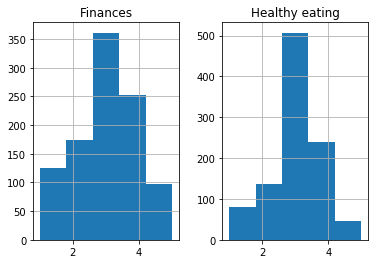

In [11]:
hist = relevant_response_df.hist(bins=5)
#sns.distplot(relevant_response_df['Finances'])

#### Data has multiple missing value and replaced with median value. and data is distributed normally.

### Create Hypothesis

### 1. Is saving money (finances) gender dependant?

$Null Hypothesis$ states saving money (finances) doesnot depend on gender and the $Alternate Hypothesis$ states saving money (finances) depend on gender

* $H_0$: $\mu{Male_{finances}}$ = $\mu{Female_{finance}}$
* $H_A$: $\mu{Male_{finances}}$ $\neq$ $\mu{Female_{finance}}$

In [12]:
import numpy as np
from scipy.stats import ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import scipy.stats as stats
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt

alpha = 0.05

print(np.abs(round(stats.norm.isf(q = 0.025),3))) # Here we use alpha by 2  for two-tailed test

1.96


In [13]:
hypothesis_1_df = relevant_response_df[['Finances','Gender']]
hypothesis_1_df.head()

,Finances,Gender
0,3.0,female
1,3.0,female
2,2.0,female
3,2.0,female
4,4.0,female


In [14]:
contigency_table_hyp1 = pd.crosstab(hypothesis_1_df["Gender"], hypothesis_1_df["Finances"])
contigency_table_hyp1

Finances,1.0,2.0,3.0,4.0,5.0
Gender,,,,,
female,65,98,223,150,63
male,60,76,138,102,35


In [15]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(contigency_table_hyp1)

print ('chi square statistics ',chi2_stat)
print ('p value ',p_val)
print ('degree of freedom ',dof)

chi square statistics  5.328890527727397
p value  0.25518454225298753
degree of freedom  4


In [16]:
# interpret p-value
print('significance=%.3f, p=%.3f' % (alpha, p_val))
if p_val <= alpha:
    print('Saving money (finances) depend on gender (reject H0)')
else:
    print('Saving money (finances) doesnot depend on gender (fail to reject H0)')

significance=0.050, p=0.255
Saving money (finances) doesnot depend on gender (fail to reject H0)


### Differences in money saving (finances) between people from city or village?

#### Null Hypothesis states saving money (finances) doesnot depend on  city / village and 
#### the Alternate Hypothesis states saving money (finances) depend on city / village

In [30]:
hypothesis_2_df = relevant_response_df[['Finances','Village - town']]

In [31]:
contigency_table_hyp2 = pd.crosstab(hypothesis_2_df["Village - town"], hypothesis_2_df["Finances"])
contigency_table_hyp2

Finances,1.0,2.0,3.0,4.0,5.0
Village - town,,,,,
city,88,133,265,168,57
village,37,41,96,84,41


In [32]:
chi2_stat2, p_val2, dof2, ex2 = stats.chi2_contingency(contigency_table_hyp2)

print ('chi square statistics ',chi2_stat2)
print ('p value ',p_val2)
print ('degree of freedom ',dof2)

chi square statistics  13.336002693956441
p value  0.009745541835991274
degree of freedom  4


In [34]:
# interpret p-value
print('significance=%.3f, p=%.3f' % (alpha, p_val2))
if p_val2 <= alpha:
    print('Saving money (finances) depend on city / village (reject H0)')
else:
    print('Saving money (finances) doesnot depend on city / village (fail to reject H0)')

significance=0.050, p=0.010
Saving money (finances) depend on city / village (reject H0)


### Do Women have a Healthier Lifestyle than Men?

In [38]:
print ("H0 - Women have a Healthier Lifestyle than Men \n"
      "H1 - Women dont have a Healthier Lifestyle than Men")

H0 - Women do not have a Healthier Lifestyle than Men 
H1 - Women have a Healthier Lifestyle than Men


In [43]:
hypothesis_3_df = relevant_response_df[['Healthy eating','Gender']]

male_health = hypothesis_3_df[hypothesis_3_df['Gender'] == 'male']['Healthy eating']
female_health = hypothesis_3_df[hypothesis_3_df['Gender'] == 'female']['Healthy eating']


statistic3, p_value3 = stats.mannwhitneyu(male_health, female_health)

# Print results

print ('P value: ',p_value3)

P value:  0.029143771281378412


In [44]:
# interpret p-value
print('significance=%.3f, p=%.3f' % (alpha, p_value3))
if p_value3 <= alpha:
    print(' Women dont have a Healthier Lifestyle than Men (reject H0)')
else:
    print(' Women have a Healthier Lifestyle than Men (fail to reject H0)')

significance=0.050, p=0.029
 Women dont have a Healthier Lifestyle than Men (reject H0)


In [ ]:
#hypothesis_3_df = relevant_response_df[['Healthy eating','Gender']]

#male_data = hypothesis_3_df[hypothesis_3_df['Gender'] == 'male'] 
#female_data = hypothesis_3_df[hypothesis_3_df['Gender'] == 'female'] 

#male_health = male_data['Healthy eating']
#female_health = female_data['Healthy eating']

#t_statistic, p_value  =  stats.ttest_ind( male_health , female_health)
#print('P Value = ', p_value)

### Are Village People Healthier than City People?

In [45]:
print ("H0 - Village People are Healthier than City People \n"
      "H1 - Village People are not Healthier than City People")

H0 - Village People are Healthier than City People 
H1 - Village People are not Healthier than City People


In [46]:
hypothesis_4_df = relevant_response_df[['Healthy eating','Village - town']]

village_health = hypothesis_4_df[hypothesis_4_df['Village - town'] == 'village']['Healthy eating']
city_health = hypothesis_4_df[hypothesis_4_df['Village - town'] == 'city']['Healthy eating']


statistic4, p_value4 = stats.mannwhitneyu(village_health, city_health)

# Print results

print ('P value: ',p_value4)

P value:  0.08549929090766084


In [47]:
# interpret p-value
print('significance=%.3f, p=%.3f' % (alpha, p_value4))
if p_value4 <= alpha:
    print('Village People are not Healthier than City People (reject H0)')
else:
    print('Village People are Healthier than City People (fail to reject H0)')

significance=0.050, p=0.085
Village People are Healthier than City People (fail to reject H0)
